In this example we will consider the mechanism of interaction with API of FEDOT.Industrial framework to solve the problem of time series classification

First of all, it is necessary to import the base class FedotIndustrial and determine the parameters of the experiment

In [2]:
from fedot_ind.api.main import FedotIndustrial

The parameters of the experiment are:

In [3]:
config = dict(task='ts_classification',
              dataset='ItalyPowerDemand',
              feature_generator='quantile',
              use_cache=False,
              error_correction=False,
              timeout=5,
              n_jobs=-1,
              window_sizes='auto')

industrial = FedotIndustrial(input_config=config,
                             output_folder=None)

2023-04-04 16:51:12,675 - Initialising experiment setup
Experiment setup:
        dataset - ItalyPowerDemand,
        feature generator - quantile,
        use_cache - False,
        error_correction - False,
        n_jobs - -1,
        timeout - 5,
        ensemble - None


Now we must download the dataset. It could be done by using `DataReader` class that implemented as attribute of `FedotIndustrial` class. This class firstly tries to read the data from local project folder `data` and then if it is not possible, it downloads the data from the UCR/UEA archive. The data will be saved in the `data` folder.

In [4]:
train_data, test_data, _ = industrial.reader.read(dataset_name='ItalyPowerDemand')

2023-04-04 16:51:12,686 - Trying to read ItalyPowerDemand data locally
2023-04-04 16:51:12,702 - Loaded data from ItalyPowerDemand local data folder
2023-04-04 16:51:12,704 - 2 classes detected


Next steps are quite straightforward. We need to fit the model and then predict the values for the test data just like for any other model in sklearn.

At the `fit` stage FedotIndustrial will transform initial time series data into features dataframe and will train Fedot classification model.

In [5]:
model = industrial.fit(train_features=train_data[0],
                       train_target=train_data[1])

2023-04-04 16:51:14,039 - Fitting model...
2023-04-04 16:51:14,041 - StatsExtractor is working...
2023-04-04 16:51:16,411 - AssumptionsHandler - Initial pipeline fitting started
2023-04-04 16:51:17,549 - AssumptionsHandler - Initial pipeline was fitted successfully
2023-04-04 16:51:17,551 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 19.9 MiB, max: 20.4 MiB
2023-04-04 16:51:17,553 - ApiComposer - Initial pipeline was fitted in 1.1 sec.
2023-04-04 16:51:17,556 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-04-04 16:51:17,574 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['logit', 'resample', 'poly_features', 'dt', 'normalization', 'rf', 'scaling', 'fast_ica', 'lgbm', 'pca', 'bernb', 'knn', 'qda', 'mlp', 'isolation_forest_class', 'logit', 'resample', 'poly_features', 'dt', 'normalization', 'rf', 'scaling', 'fast_i

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-04-04 16:51:17,618 - MultiprocessingDispatcher - Number of used CPU's: 8
2023-04-04 16:51:22,592 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2023-04-04 16:51:22,599 - EvoGraphOptimizer - Generation num: 1 size: 1
2023-04-04 16:51:22,602 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<ClassificationMetricsEnum.ROCAUC_penalty=-0.886 ComplexityMetricsEnum.node_num=0.200>']
2023-04-04 16:51:25,500 - MultiprocessingDispatcher - Number of used CPU's: 8
2023-04-04 16:51:34,977 - MultiprocessingDispatcher - 21 individuals out of 21 in previous population were evaluated successfully.
2023-04-04 16:51:34,980 - EvoGraphOptimizer - Generation num: 2 size: 21
2023-04-04 16:51:34,983 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<ClassificationMetricsEnum.ROCAUC_penalty=-0.916 ComplexityMetricsEnum.node_num=0.300>']
2023-04-04 16:51:34,986 - EvoGraphOptimizer - Next population siz

Generations:   0%|          | 1/10000 [00:50<?, ?gen/s]

2023-04-04 16:52:08,579 - OptimisationTimer - Composition time: 0.85 min
2023-04-04 16:52:08,582 - EvoGraphOptimizer - Generation num: 8 size: 1
2023-04-04 16:52:08,584 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<ClassificationMetricsEnum.ROCAUC_penalty=-0.916 ComplexityMetricsEnum.node_num=0.300>']
2023-04-04 16:52:08,586 - EvoGraphOptimizer - no improvements for 6 iterations
2023-04-04 16:52:08,588 - EvoGraphOptimizer - spent time: 0.9 min
2023-04-04 16:52:08,595 - GPComposer - GP composition finished
2023-04-04 16:52:08,601 - DataSourceSplitter - K-folds cross validation is applied.
2023-04-04 16:52:08,603 - ApiComposer - Hyperparameters tuning started with 4 min. timeout
2023-04-04 16:52:08,609 - SimultaneousTuner - Hyperparameters optimization start: estimation of metric for initial pipeline


2023-04-04 16:52:11,146 - SimultaneousTuner - Initial graph: {'depth': 3, 'length': 3, 'nodes': [rf, poly_features, scaling]}
rf - {'n_jobs': 1}
poly_features - {}
scaling - {} 
Initial metric: 0.847
  0%|          | 0/100000 [00:00<?, ?trial/s, best loss=?]2023-04-04 16:52:11,194 - build_posterior_wrapper took 0.021713 seconds
2023-04-04 16:52:11,198 - TPE using 0 trials
  0%|          | 1/100000 [00:02<74:08:49,  2.67s/trial, best loss: -0.747498]2023-04-04 16:52:13,859 - build_posterior_wrapper took 0.014781 seconds
2023-04-04 16:52:13,861 - TPE using 1/1 trials with best loss -0.747498
  0%|          | 2/100000 [00:05<73:00:13,  2.63s/trial, best loss: -0.747498]2023-04-04 16:52:16,460 - build_posterior_wrapper took 0.017531 seconds
2023-04-04 16:52:16,462 - TPE using 2/2 trials with best loss -0.747498
  0%|          | 3/100000 [00:07<62:21:54,  2.25s/trial, best loss: -0.747498]2023-04-04 16:52:18,247 - build_posterior_wrapper took 0.014882 seconds
2023-04-04 16:52:18,250 - TPE u

The output of the `fit` method is the trained Fedot model in the form of `pipeline` that can be used for prediction.

Actually, we have access to it and are able to visualize:

{'depth': 3, 'length': 3, 'nodes': [rf, poly_features, scaling]}


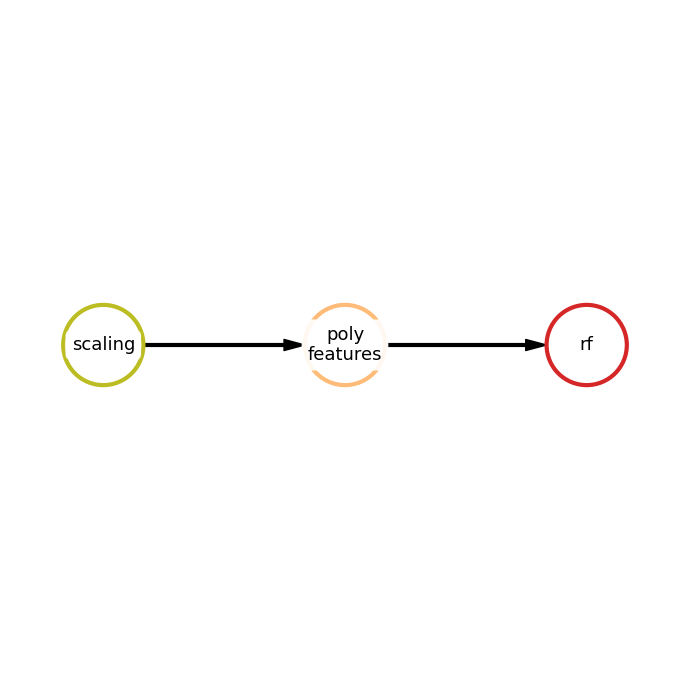

In [10]:
print(model.current_pipeline)

model.current_pipeline.show(node_size_scale=1)

Next, we can predict the values for the test data. In the case of time series classification, the output of the model is the predicted class for each time series in the test data or the probability of belonging to each class.

In [11]:
labels = industrial.predict(test_features=test_data[0])

print(labels)

[[1]
 [2]
 [1]
 ...
 [1]
 [2]
 [2]]


In [12]:
probs = industrial.predict_proba(test_features=test_data[0])

print(probs)

[[0.45533333]
 [0.50383333]
 [0.424     ]
 ...
 [0.33316667]
 [0.8385    ]
 [0.77216667]]


At the end of the experiment we can obtain the desiered metric values using `get_metrics` method. Now there are five available metrics for classification task:
- `f1`
- `roc_auc`
- `accuracy`
- `precision`
- `recall`.

Let's say we want to get the `roc_auc` metric for the test data since ItalyPowerDemand dataset is binary.

In [13]:
metric = industrial.get_metrics(target=test_data[1],
                                metric_names=['roc_auc'])
print(metric)

{'roc_auc': 0.752}


Also, there is an opportunity to save metrics, predicted labels and probabilities to the csv file:

In [14]:
for pred in [labels, probs]:
    industrial.save_predict(predicted_data=pred)

industrial.save_metrics(metrics=metric)

/Users/technocreep/Desktop/Working-Folder/fedot-industrial/Fedot.Industrial/core/api/utils/saver_collections.py:32: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  df = pd.DataFrame(label_data, dtype=int)
